准确率: 91%


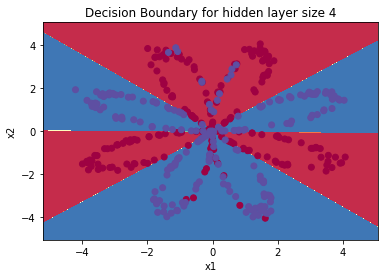

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

X,Y=load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=Y,s=30,cmap=plt.cm.Spectral)


'''
1.定义神经网络结构（输入单元的数量，隐藏单元的数量等）。
2.初始化模型的参数
3.循环：
    实施前向传播
    计算损失
    实现向后传播
    更新参数（梯度下降）
4.合并到一个nn_model() 函数中,当构建好nn_model（）并学习了正确的参数，就可以预测新的数据。
'''



def layer_sizes(X,Y):  
    n_x=X.shape[0] #输入层
    n_h=4 #隐藏层
    n_y=Y.shape[0] #输出层
    
    return (n_x,n_h,n_y)

def initialize_parameters(n_x,n_h,n_y):
    W1=np.random.rand(n_h,n_x)
    b1=np.zeros(shape=(n_h,1))
    W2=np.random.rand(n_y,n_h)
    b2=np.zeros(shape=(n_y,1))
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters

def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    #前向传播计算A2
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    assert(A2.shape==(1,X.shape[1]))
    cache={
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return (A2,cache)

def backward_propagation(parameters,cache,X,Y):
    m=Y.shape[1]
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.multiply(np.dot(W2.T,dZ2),1-np.power(A1,2))
    dW1=(1/m)*np.dot(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    
    return grads

def update_parameters(parameters,grads,learning_rate):
    W1,W2=parameters["W1"],parameters["W2"]
    b1,b2=parameters["b1"],parameters["b2"]
    
    dW1,dW2=grads["dW1"],grads["dW2"]
    db1,db2=grads["db1"],grads["db2"]
    
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters

def nn_model(X,Y,num_iterations):
    n_x=layer_sizes(X,Y)[0]
    n_h=layer_sizes(X,Y)[1]
    n_y=layer_sizes(X,Y)[2]
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    for i in range(num_iterations):
        A2,cache=forward_propagation(X,parameters)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=update_parameters(parameters,grads,learning_rate=0.2)
        
    return parameters

def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    predictions=np.round(A2)
    
    return predictions

parameters = nn_model(X, Y, num_iterations=50000)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(layer_sizes(X,Y)[1]))

predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
